In [24]:
import pandas as pd
import numpy as np
from HPprophecy import Prophecy
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(30,10)
plt.style.use('ggplot')

In [25]:
dataF=pd.read_csv('C:/Users/saragada/Desktop/HPI/Fresh Start Forecast/Data/dataslice_rest.csv',encoding='latin-1')

In [26]:
df=dataF.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})
df=df.reset_index()

In [27]:
df=df[['VAL_DT','USD_AMT']]

In [28]:
df.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)


In [29]:
df['ds'] =pd.to_datetime(df.ds)
df=df[(df['ds']>'2016-08-01')]
df=df[df['ds']<'2018-01-01']
df.index = df['ds'] 

In [30]:
df=df.resample('M').sum()
df=df.reset_index()

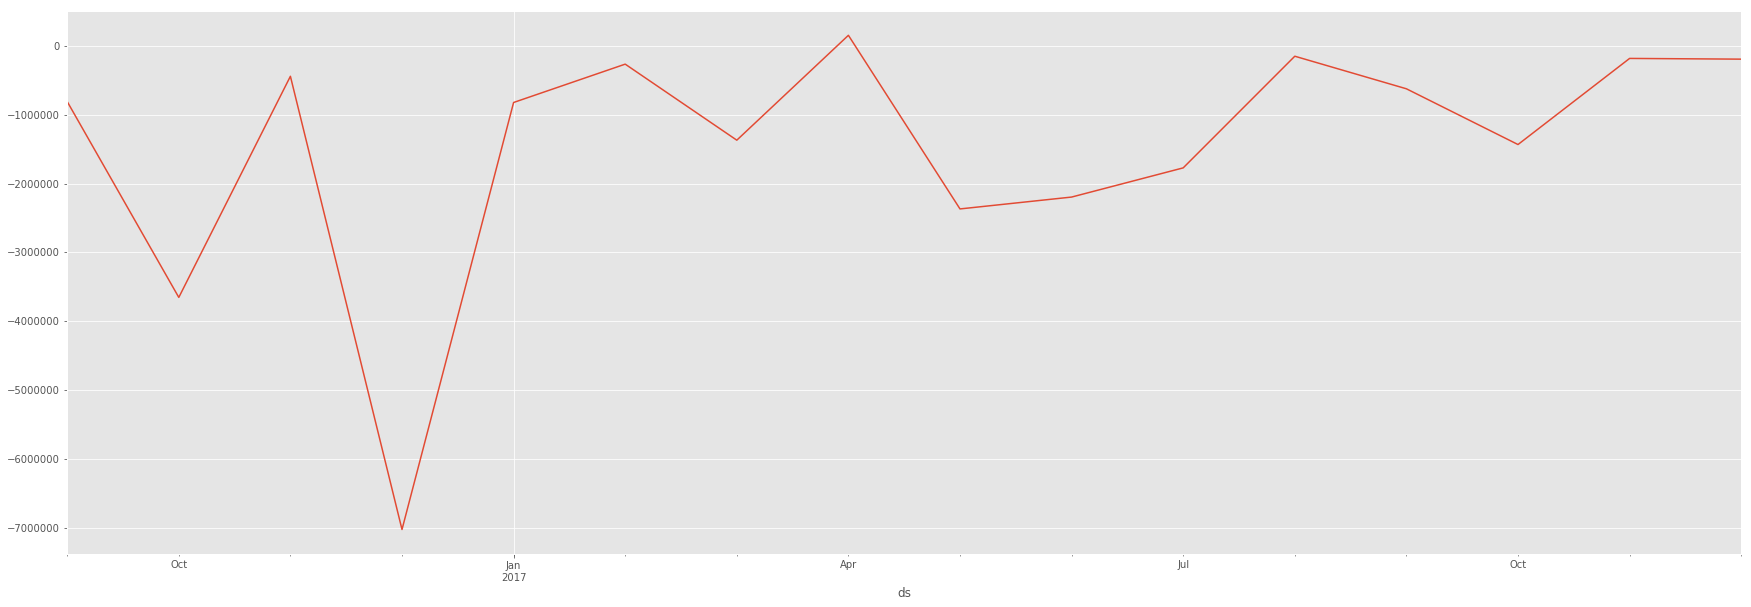

In [31]:
df.set_index('ds').y.plot()

INFO:HPprophecy.forecaster:Disabling yearly seasonality. Run prophecy with yearly_seasonality=True to override this.
INFO:HPprophecy.forecaster:Disabling weekly seasonality. Run prophecy with weekly_seasonality=True to override this.
INFO:HPprophecy.forecaster:Disabling daily seasonality. Run prophecy with daily_seasonality=True to override this.
INFO:HPprophecy.forecaster:n_changepoints greater than number of observations.Using 11.0.
C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


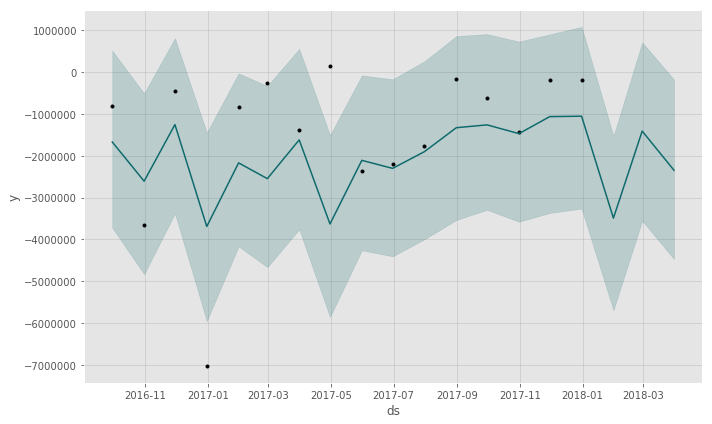

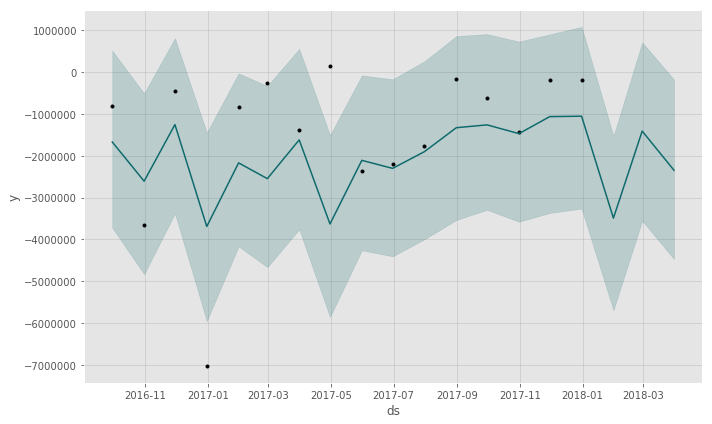

In [35]:
m = Prophecy(changepoint_prior_scale=0.01)
m.add_seasonality(name='monthly', period=12, fourier_order=4,prior_scale=200).fit(df)

future = m.make_future_dataframe(periods=3, freq='M')
forecast = m.predict(future)
m.plot(forecast)



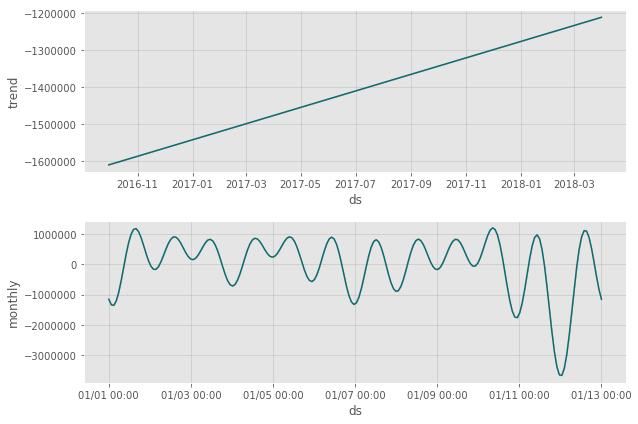

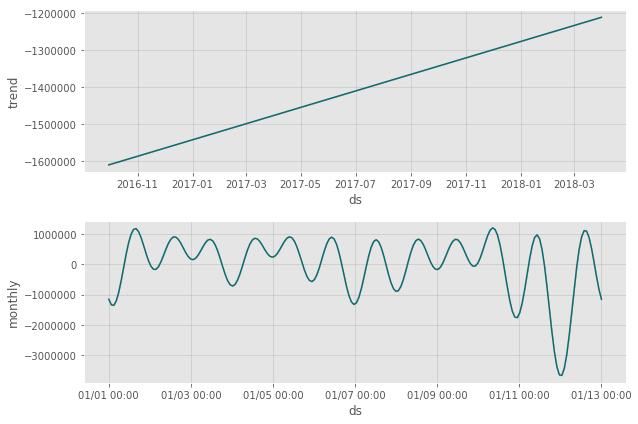

In [12]:
m.plot_components(forecast)

In [13]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [14]:
viz_df =df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

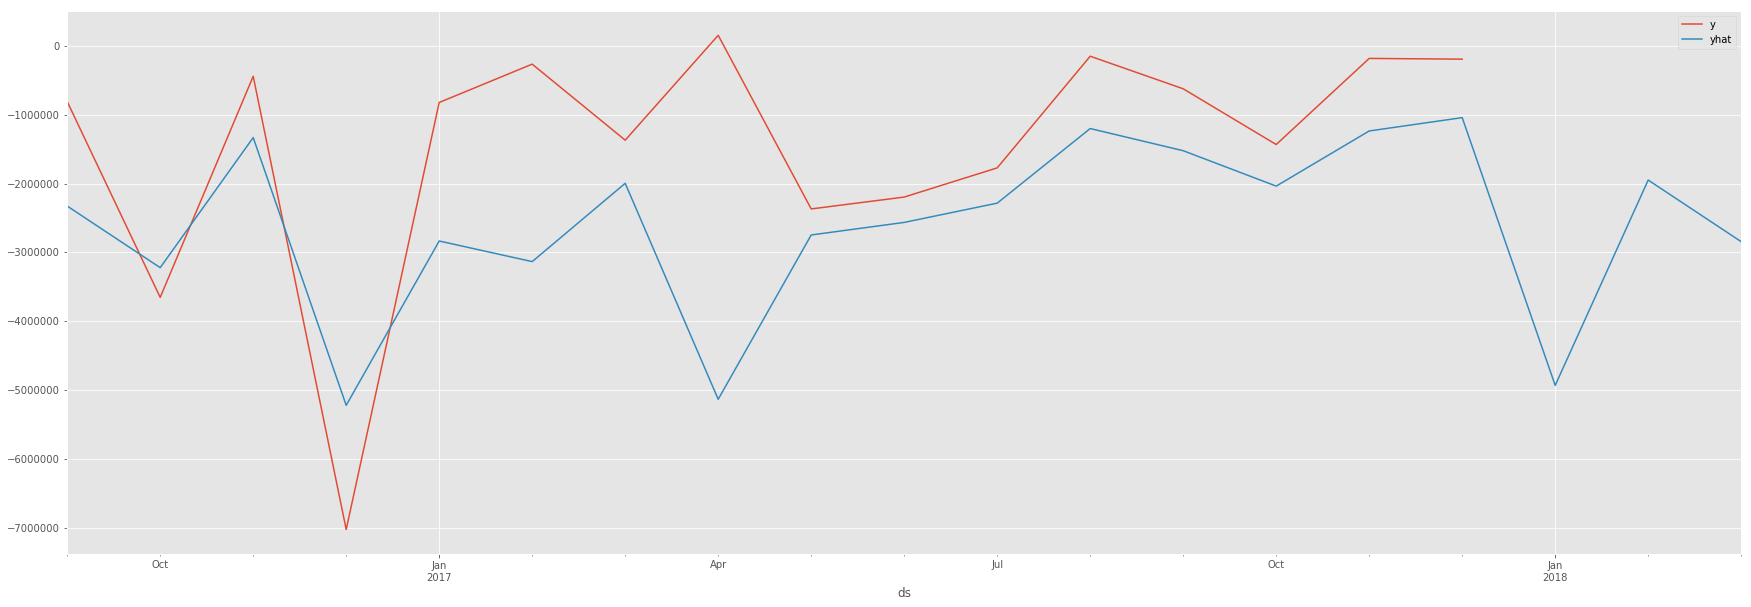

In [15]:
viz_df[['y', 'yhat']].plot()

In [16]:
accuracy=forecast['yhat'][:len(df)]/(df['y'])

In [17]:
accuracy

ds
2016-09-30     2.873457
2016-10-31     0.881765
2016-11-30     3.009069
2016-12-31     0.743307
2017-01-31     3.443004
2017-02-28    11.749646
2017-03-31     1.456873
2017-04-30   -33.784926
2017-05-31     1.159619
2017-06-30     1.167532
2017-07-31     1.288851
2017-08-31     7.920755
2017-09-30     2.439566
2017-10-31     1.421033
2017-11-30     6.734447
2017-12-31     5.372048
dtype: float64

In [22]:
p=pd.DataFrame()

In [ ]:
p['fcst']=k

In [ ]:
p.to_csv('data1.csv')

In [ ]:
type(fcst)

In [ ]:
type(data['y'])

In [23]:
k=pd.DataFrame(data['y'])

In [24]:
p['y']=k

In [29]:
p['fcst']=pd.DataFrame(fcst['yhat'])

In [30]:
p['date']=pd.DataFrame(fcst['ds'])

In [31]:
p.to_csv('predict.csv')

In [32]:
import matplotlib.pyplot as plt
 
%matplotlib inline #only needed for jupyter
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: #only needed for jupyter


In [58]:
df.set_index('ds', inplace=True)
fcst.set_index('ds', inplace=True)

In [59]:

viz_df = df.join(fcst[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']


KeyError: 'index'

In [63]:
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]

In [69]:
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(df.y)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
    
  
# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot


In [200]:
viz_df[['y', 'yhat']]

y          yhat
ds                                    
2016-05-31 -4.538956e+08 -7.525434e+08
2016-06-30 -1.324148e+09 -1.166523e+09
2016-07-31 -1.147764e+09 -1.177867e+09
2016-08-31 -2.062945e+09 -1.403080e+09
2016-09-30 -1.658654e+09 -1.429673e+09
2016-10-31 -2.346671e+09 -1.967556e+09
2016-11-30 -1.872263e+09 -1.568981e+09
2016-12-31 -2.214745e+09 -2.002672e+09
2017-01-31 -2.323777e+09 -1.937300e+09
2017-02-28 -1.566027e+09 -2.362337e+09
2017-03-31 -1.887860e+09 -2.017670e+09
2017-04-30 -1.985068e+09 -2.397453e+09
2017-05-31 -1.588448e+09 -2.332081e+09
2017-06-30 -1.785170e+09 -2.117676e+09
2017-07-31 -1.844455e+09 -2.469300e+09
2017-08-31 -2.113890e+09 -2.480643e+09
2017-09-30 -2.261506e+09 -2.509640e+09
2017-10-31 -1.766090e+09 -2.732449e+09
2017-11-30 -1.922328e+09 -2.903247e+09
2017-12-31 -2.197338e+09 -2.871756e+09
2018-01-31           NaN -3.305448e+09
2018-02-28           NaN -3.127229e+09
2018-03-31           NaN -3.665112e+09

In [201]:
actF=dataF.groupby('VAL_DT', as_index=False).agg({"USD_AMT": "sum"})

In [202]:
actF=actF.reset_index()

In [203]:
actF=actF[['VAL_DT','USD_AMT']]

In [204]:
actF.rename(columns={'VAL_DT': 'ds', 'USD_AMT': 'y'}, inplace=True)

In [205]:
actF['ds'] =pd.to_datetime(actF.ds)
actF=actF[actF['ds']>'2017-12-31']
actF.index = actF['ds'] 

In [207]:
actF=actF.resample('M').sum()
actF=actF.reset_index()

In [216]:
p

ds             y
0 2018-01-31 -2.107693e+09
1 2018-02-28 -1.630033e+09
2 2018-03-31 -1.489889e+09

In [214]:
p=actF[:3]

In [220]:
q=forecast['yhat'][len(df):]

In [221]:
q

ds
2018-01-31   -3.305448e+09
2018-02-28   -3.127229e+09
2018-03-31   -3.665112e+09
Name: yhat, dtype: float64

In [223]:
accuracy=pd.DataFrame(q)/pd.DataFrame(p)

In [224]:
accuracy

ds   y  yhat
2018-01-31 00:00:00  NaN NaN   NaN
2018-02-28 00:00:00  NaN NaN   NaN
2018-03-31 00:00:00  NaN NaN   NaN
0                    NaN NaN   NaN
1                    NaN NaN   NaN
2                    NaN NaN   NaN